In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow import constant
from matplotlib import pyplot

In [2]:
device_name = tf.test.gpu_device_name()
device_name

'/device:GPU:0'

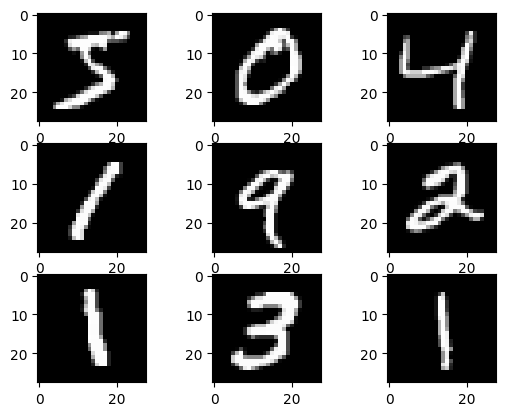

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [4]:
num_classes = 10
input_shape = (28,28,1)

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

for i in range(9):
  pyplot.subplot(330 + 1 + i)
  pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))
pyplot.show();

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

print(f'X_train shape: {X_train.shape}')
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

y_train = keras.utils.to_categorical(y_train, num_classes) 
y_test = keras.utils.to_categorical(y_test, num_classes) 


In [6]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_1 (Dropout)         (None, 1600)             

In [7]:
%%time
batch_size = 128
epochs = 15

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Epoch 1/15
422/422 [==============================] - 13s 6ms/step - loss: 0.3628 - accuracy: 0.8923 - val_loss: 0.0846 - val_accuracy: 0.9775
Epoch 2/15
422/422 [==============================] - 2s 4ms/step - loss: 0.1076 - accuracy: 0.9681 - val_loss: 0.0564 - val_accuracy: 0.9843
Epoch 3/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0813 - accuracy: 0.9746 - val_loss: 0.0426 - val_accuracy: 0.9875
Epoch 4/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0663 - accuracy: 0.9798 - val_loss: 0.0384 - val_accuracy: 0.9902
Epoch 5/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0618 - accuracy: 0.9813 - val_loss: 0.0365 - val_accuracy: 0.9892
Epoch 6/15
422/422 [==============================] - 2s 4ms/step - loss: 0.0542 - accuracy: 0.9834 - val_loss: 0.0354 - val_accuracy: 0.9905
Epoch 7/15
422/422 [==============================] - 2s 4ms/step - loss: 0.0494 - accuracy: 0.9848 - val_loss: 0.0336 - val_accuracy: 0.9913
Epoch

In [8]:
score = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score[0]}')
print(f'Test accuracy: {score[1]}')

Test loss: 0.02513342723250389
Test accuracy: 0.9916999936103821


In [9]:
model.save('modeloKeras.h5')

In [10]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 84.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 kB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.7/286.7 kB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 72.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 

In [19]:
import gradio
import gradio as gr

model = tf.keras.models.load_model('modeloKeras.h5')

def recognize_digit(image):
    image = image.reshape(1, 28, 28, 1)
    prediction = model.predict(image).tolist()[0]
    return {str(i): prediction[i] for i in range(10)}

im = gradio.inputs.Image(shape=(28, 28), image_mode='L', invert_colors=True, source='canvas')

iface = gradio.Interface(
    recognize_digit,
    im,
    gradio.outputs.Label(num_top_classes=3),
    interpretation='default',
    capture_session=True,
)

iface.test_launch()

/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:259: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)
/usr/local/lib/python3.10/dist-packages/gradio/deprecation.py:40: UserWarning: `capture_session` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.10/dist-packages/gradio/i

In [20]:
iface.launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>